In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [9]:
from sklearn.datasets import make_blobs

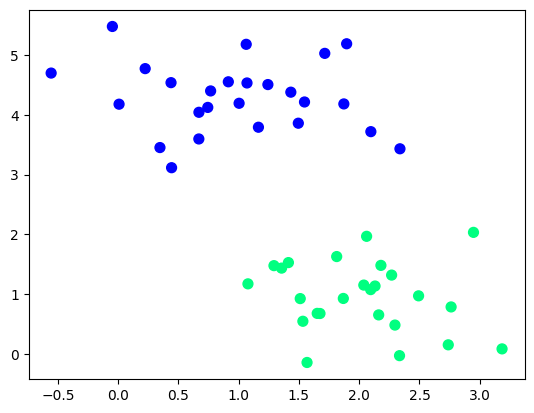

In [10]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');
#std is standard deviation for two groups

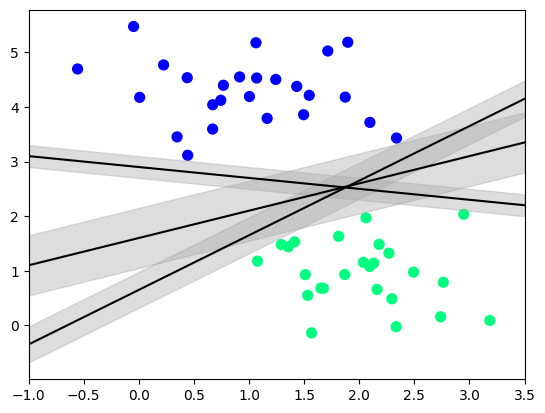

In [11]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='#AAAAAA', alpha=0.4)
  # d is the distance form the line
  # m is the slope

plt.xlim(-1, 3.5);

In [12]:
from sklearn.svm import SVC # "Support vector classifier"

In [13]:
model=SVC(kernel='linear',C=1E10) #https://www.csie.ntu.edu.tw/~cjlin/libsvm/
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  print(xlim,ylim)
  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k',
  levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])

  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
  s=300, linewidth=1, facecolors='none', edgecolors='r');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

(-0.7425578984849813, 3.3721920271976598) (-0.41872382476349596, 5.754870487889891)


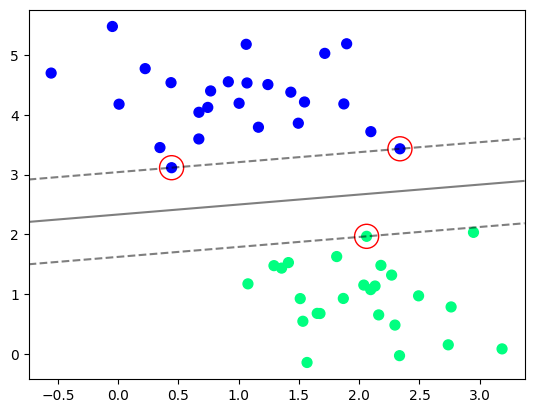

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model)

In [16]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

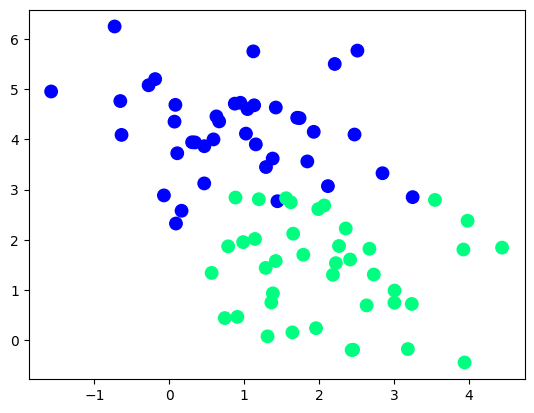

In [17]:
X, y = make_blobs(n_samples=80, centers=2,random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='winter');
#std is standard deviation for two groups

In [18]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2,
  random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
  for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [19]:
from sklearn.datasets import make_circles


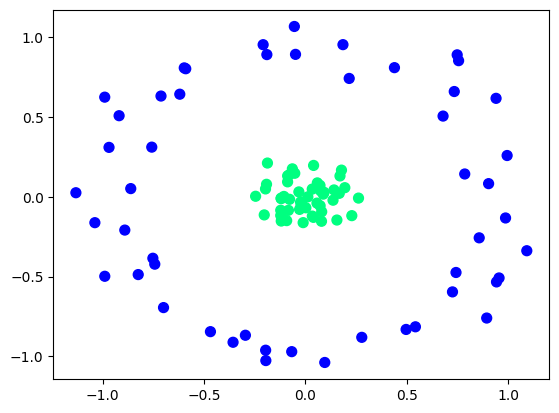

In [20]:
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

(-1.24408926012816, 1.203399947996776) (-1.1428058527750082, 1.1727984900614188)


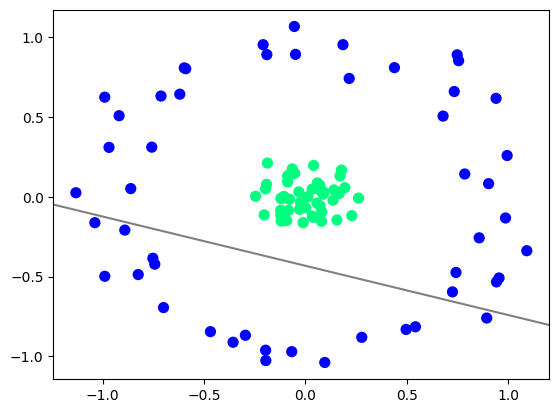

In [21]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

In [22]:
from mpl_toolkits import mplot3d
from ipywidgets import *

In [23]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


interactive(children=(Output(),), _dom_classes=('widget-interact',))

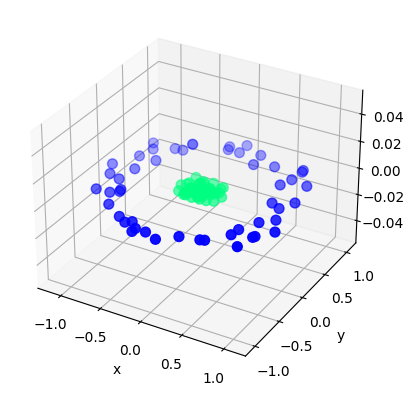

In [28]:
from mpl_toolkits import mplot3d
from ipywidgets import *
def plot_3D(X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
  #ax.view_init()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')
interact(plot_3D,X=fixed(X), y=fixed(y));